In [1]:
# importing dataset 
import pandas as pd 
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [3]:
# looking to find all unique values to see if theres anything that might need fixing
# looks like anyone who is 144/123 has to go
df.person_age.unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67])

In [9]:
# made new variable that contains values i want to delete 
delete = [144, 123]
df_mod = df[~df['person_age'].isin(delete)]
df_mod['person_age'].unique()

array([22, 21, 25, 23, 24, 26, 20, 32, 34, 29, 33, 28, 35, 31, 27, 30, 36,
       40, 50, 45, 37, 39, 44, 43, 41, 46, 38, 47, 42, 48, 49, 58, 65, 51,
       53, 66, 61, 54, 57, 59, 62, 60, 55, 52, 64, 70, 78, 69, 56, 73, 63,
       94, 80, 84, 76, 67])

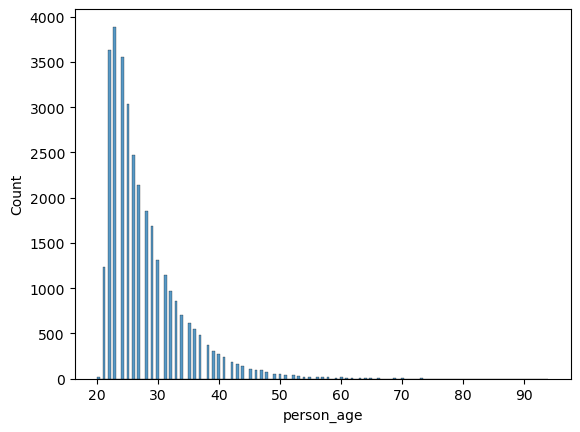

In [12]:
# now lets make a histplot that shows us a distrubution of age
# as we can see, looks like majority of our data are people from 20-40 years old
# hist is right skewed,  meaning there are older people getting loans 
import seaborn as sns 
import matplotlib.pyplot as plt

sns.histplot(data=df_mod, x='person_age')
plt.show()

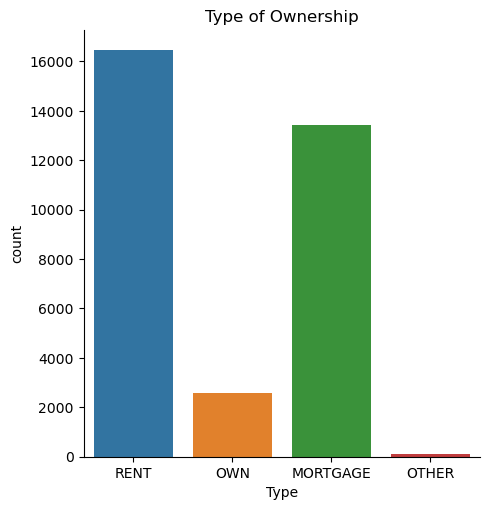

In [20]:
sns.catplot(data=df_mod, kind='count', x='person_home_ownership')
plt.title('Type of Ownership')
plt.xlabel('Type')
plt.show()

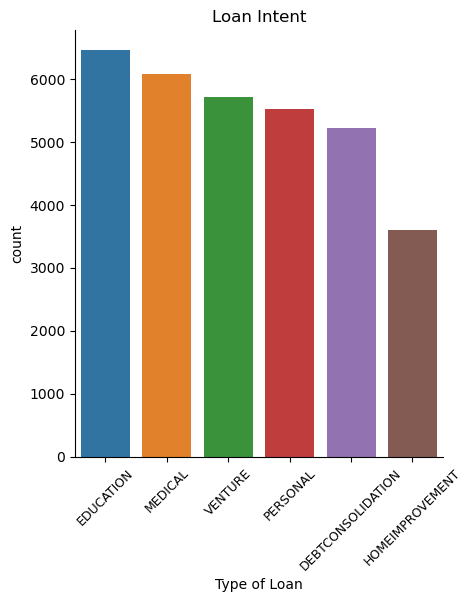

In [48]:
# loan intent 

loan_counts = df_mod['loan_intent'].value_counts()
order = loan_counts.index


sns.catplot(data=df_mod, kind='count', x='loan_intent', order=order)
plt.xticks(rotation=45, fontsize = 9)
plt.xlabel('Type of Loan')
plt.title('Loan Intent')
plt.rcdefaults()
plt.show()

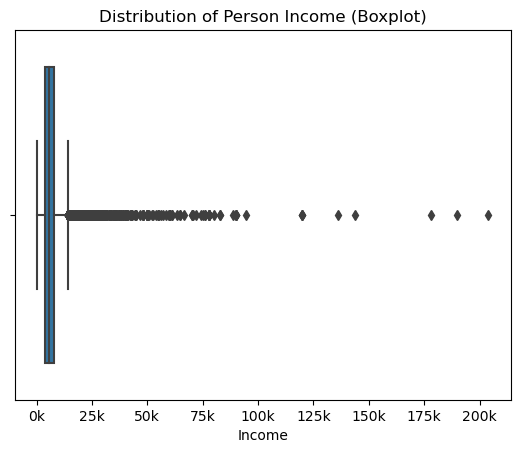

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# data plotting code
sns.boxplot(data=df_mod, x='person_income')
plt.xlabel('Income')
plt.title('Distribution of Person Income (Boxplot)')

# function to format tick labels in thousands
def format_thousands(x, pos):
    return f'{int(x / 10000)}k'

# Set x-tick labels using FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_thousands))

# Display the plot
plt.show()
